# 第2章 神经网络的数学基础

- 张量（tensor）
- 张量运算（tensor operation）
- 微分（differentiation）
- 梯度下降（gradient descent）

## 2.1 初始神经网络

MNIST 数据集包含了 7 万张 28 x 28 像素表示 0-9 数字的灰度图像，其中 6 万训练图像，1 万张测试图像。

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# shepe 属性
print(train_images.shape)
type(train_images)


In [ ]:
print(train_labels.shape)
type(train_labels)

构建神经网络架构

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

> 本例中的模型包含 2 个 Dense 层，这两个层分别是密集连接（也叫全连接）的神经层。第二（也是最后一个）层是一个 10 路 softmax 层，它将返回一个由 10 个概率值（总和为 1）组成的数组。每个概率值表示当前数字图像属于 10 个数字类别中某一个的概率。

在训练模型之前，我们好需要指定**编译**（compilation）步骤的 3 个参数。
- **优化器**（optimizer）

- **损失函数**（loss function）
- 训练过程中需要监控的**指标**（metric），如精度（accuracy）

In [5]:
model.compile(optimizer='rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ["accuracy"])

代码清单 2-4 准备图像

In [6]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

代码清单 2-5 拟合模型

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

> `epochs` 参数指定了模型在整个训练数据集上训练的轮数。
>
> `batch_size` 参数指定了每次更新模型权重时所使用的样本数量。

代码清单 2-6 利用模型进行预测

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

> 这个数组是对 `test_digits[0]` 的预测结果，数字的含义表示概率，其中在索引为 7 的位置数值最大，所以预测结果为 7。

In [ ]:
predictions[0].argmax()

代码清单 2-7 在新的数据上评估模型

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

> 测试精度约为 97.8%,比训练精度(98.9%)低不少。训练精度和测试精度之间的这种差距  是过拟合(overfit)造成的。

## 2.2 神经网络的数据表示

**张量**（tensor）是数据的容器，可以有多个维度，维度通常叫做**轴**（axis）。例如，一个 2 维的张量也称为 2 阶张量。

### 2.2.1 标量（0 阶张量）

仅包含一个数字的张量叫做**标量**（scalar），也叫做 标量张量、0 阶张量或 0 维张量。

### 2.2.2（1 阶张量）

数字组成的数组也叫做**向量**（vector），也叫 1 阶张量或  1 维张量。

包含 5 个元素的向量称为 **5 维度向量**。

### 2.2.3（2 阶张量）

向量组成的数组叫做**矩阵**（matrix）。第一个轴上的元素叫做**行**（row），第二个轴上的元素叫做**列**（column）。

### 2.2.4 3 阶张量与更高阶的张量

### 2.2.5 关键属性

- **轴的个数**（阶数， `arry.ndim`）

- **形状**（`arry.shape`）

- **数据类型**（`arry.dtype`）

代码清单 2-8 显示第 4 个数字

In [ ]:
import matplotlib.pyplot as plt 
digit = train_images[4] 
plt.imshow(digit, cmap=plt.cm.binary) 
plt.show()

### 2.2.6 在 NumPy 中操作张量

**张量切片**（tensor slicing）

```
# 这连个效果一样
my_slice = train_images[10:100]
my_slice = train_images[10:100, :, :]
```


### 2.2.7 数据批量的概念

通常情况，深度学习中所有数据张量的第一个轴都是**样本轴**（sample axis），也叫做**批量轴**（batch axis）或**批量维度**（batch dimension）

深度学习模型不会一次处理整个数据集，而是按照批量轴拆分成多个小批量。

### 2.2.8 现实世界中的数据张良实例

向量数据、时间序列数据或序列数据、图像数据、视频数据

### 2.2.9 向量数据

2 阶向量的第 1 个轴是**样本轴**，第 2 个轴是**特征轴**（fetures axis）

### 2.2.10 时间序列数据或序列数据

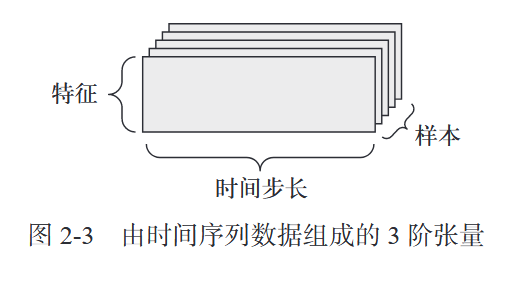

### 2.2.11 图像数据

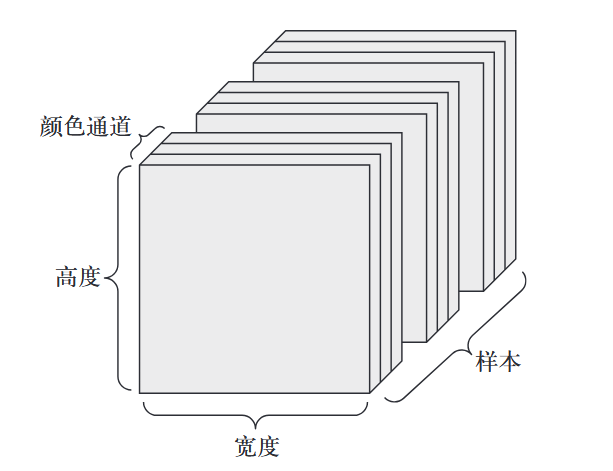

图像张量的形状有两种约定：

- **通道在后**（channels-last，TensorFlow 的标准）：（samples, height, width, dolor_depth）

- **通道在前**（channels_first，越来越少用了）：(samples, color_depth, height, width)

### 2.2.12 视频数据

视频数据是现实世界为数不多 5 阶张量：（samples, frames, height, width, dolor_depth）

## 2.3 神经网络的 “齿轮” ：张量运算

深度神经网络中所有变换都可以简化为对数值数据张量的**张量运算**（tensor operation）或**张量函数**（tensor function）

```
keras.layers.Dense(512, activation="relu")
```

**层**的概念相当于是一个函数，输入一个矩阵，返回另一个矩阵。

### 2.3.1 逐元素运算

relu 运算和加法运算都是逐元素运算（element-wise），即该运算分别应用于张量的每个元素。这些运算非常适合大规模并行实现（**向量化**实现）。

> 在实践中处理 NumPy 数组时，这些预算都是优化好的 NumPy 内置函数。这些函数将大量运算交给基础线性代数程序集（Basic Linear Algebra Subprograms, BLAS）实现。BLAS 时低层次、高度并行、高效的张量操作程序，通常用 Fortran 或 C 语言来实现。

### 2.3.2 广播

两个形状不同的张量之间的**相加**，在没有歧义且可行的情况下，较小的张量会被**广播**（broadcast），以匹配交大张量的形状：

- 向较小张量添加轴 [ 叫做**广播轴**（broadcast axis）] ，使其 ndim 与较大张量相同。

- 向较小张量沿着新轴重复，使其形状与较大张量相同。

### 2.3.3 张量积

**张量积**（tensor product）或**点积**（dot product）是最常见且最有用的张量运算之一，数学符号（ • ）。

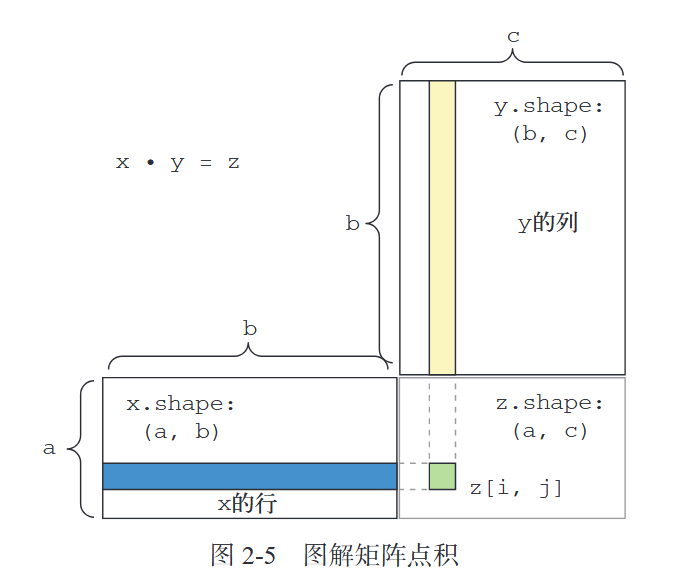

### 2.3.4 张量变形

**张量变形**（tensor reshaping）：`arry.reshape((shape))`

**转置**（transpose）：`np.transpose(arry)`

### 2.3.5 张量的几何解释

张量可以看作是空间空的**点**或原点到该点的**箭头**。

张量**加法**可以看作是**点**沿箭头方向平移之后的结果。

一般来说，平移、旋转、缩放、倾斜等基本的集合操作都可以表示为张量运算。
- **平移**（translation）：如前所述，可以表示张量相加。
- **旋转**（rotation）：

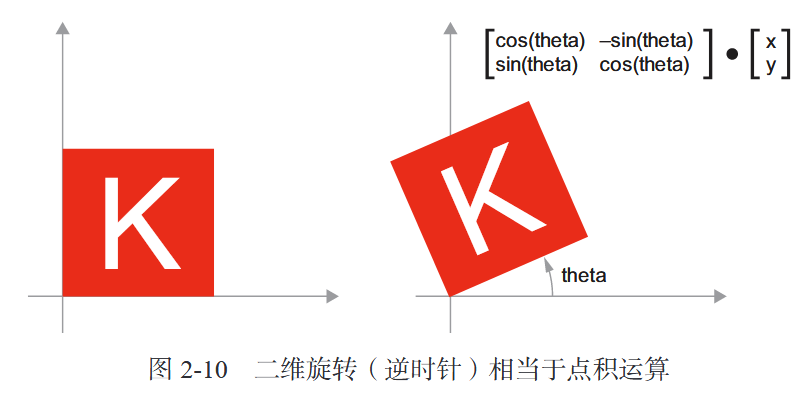

- **缩放**（scaling）：

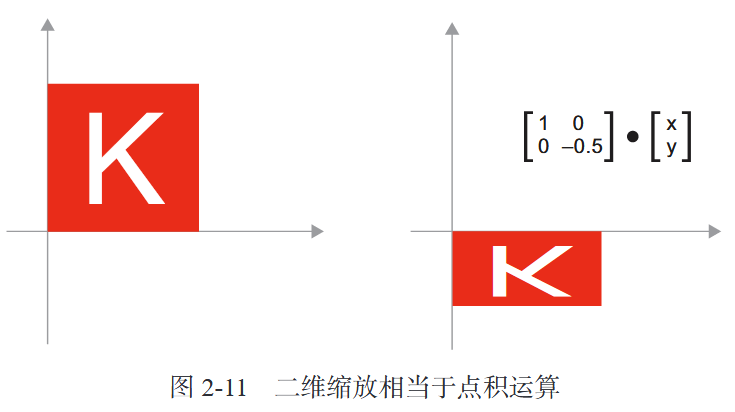

- **线性变换**（linear transform）：前面的旋转和缩放也属于线性变换

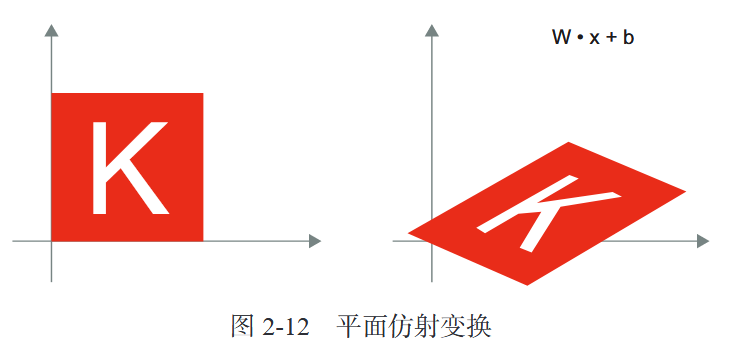

- **仿射变换**（affine transform）是一次线性变化与一次平移的组合。

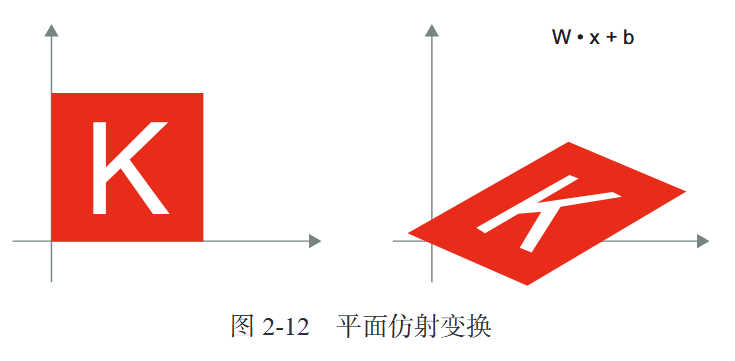

- **带有 relu 激活函数的 Dense 层**。重复应用多次仿射变换，仍相当于一次仿射变换。

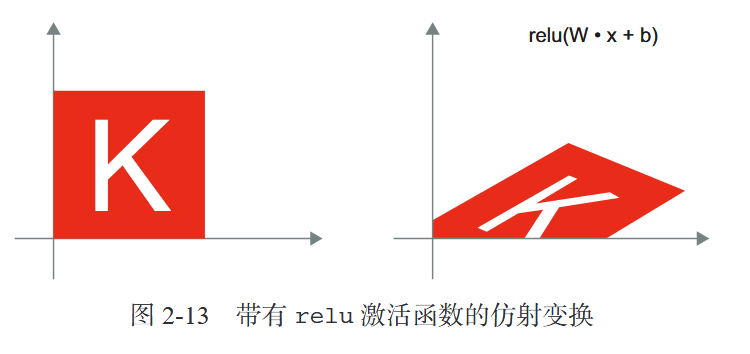

### 2.3.6 深度学习的几何解释

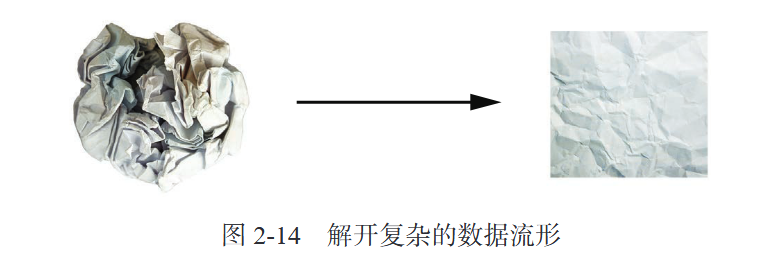

让纸团恢复平整就是机器学习的目的：为高位空间中复杂、高度折叠的数据**流行**（manifold）找到简洁的表示。

## 2.4 神经网络的 “引擎” ：基于梯度的优化

每个神经层对输入数据进行如下变换。

```
output = relu(dot(input, W) + b)
```

在这个表达式中， `W` 和 `b` 是张量，均为该层的属性。他们被称为该层的**权重**（weight）或**可训练参数**（trainable parameter），分别对应属性 kernel 和 bias。

一开始，这些权重矩阵取较小的随机值，这一步叫做**随机初始化**（random initialization）。之后的步骤就是根据反馈信号逐步调节这些权重，这个过程称为**训练**（tranining），也就是 “学习” 的过程。

一个**训练循环**（training loop）内的具体流程：

- 抽取训练样本 `x` 和对应的目标 `y_true` 组成一个数据批量。

- 在 `x` 上运行模型 [ 这一步叫做**前向传播**（forward pas）]，得到预测值 `y_pred`。

- 计算模型在这批数据上的损失，用于衡量 `y_pred` 和 `y_true` 之间的差距。

- 更新模型的所有权重，以略微减小模型在这批数据上的损失值。

在更新某个权重系数 `a` 的时候，分别计算 `a+0.5` 和 `a-0.5` 时的损失值，选取损失值最小的系数值进入下一轮循环。

这种方法非常低效，因为系数有很多，对每个系数都要计算两次前向传播。一种更好的方法是**梯度下降法**（gradient descent）。

- **可微**（differentiable）

- **梯度**（gradient）

### 2.4.1 什么是导数

**连续性**（continuity）

### 2.4.2 张量运算的导数：梯度

张量运算（或张量函数）的导数叫做**梯度**（gradient）。

> **梯度计算的本质**
>
> 权重张量 $W$ 是一个多维数组（例如形状为 $[n_{in}, n_{out}]$ 的矩阵）。每个元素 $W_{ij}$ 是一个独立的参数。反向传播的目标就是计算损失函数 $L$ 对每个 $W_{ij}$ 的偏导数 $\frac{\partial L}{\partial W_{i,j}}$，最终形成一个与 $W$ 形状相同的梯度张量 $\nabla_{W}L$


### 2.4.3 随机梯度下降

**小批量随机梯度下降**（mini-batch stochastic gradient descent，简称SGD）算法：

- 抽取训练样本 `x` 和对应目标 `y_true` 组成一个数据批量。

- 在 `x` 上运行模型，得到预测值 `y_pred`。这一步叫做**前向传播**。

- 计算模型在这批数据上的损失值，用于衡量 `y_pred` 和 `y_true` 之间的差距。

- 计算损失相对于模型参数的梯度。这一步叫做**反向传播**（backward pass）。

- 讲参数沿着梯度的反方向移动一小步。**学习率**（learning_rate）是以一个调节梯度下降 “速度” 的标量因子。


**随机**（stochastic）指的是每批数据都是随机抽取的。

如果每次迭代只抽取一个样本和目标，这个算法叫做**真 SGD**（true SGD）。

如果每次迭代都在所有数据上运行，叫做**批量梯度下降**（batch gradient descent）。

此外，SGD 还有多种变体，比如带**动量**的 SGD、Adagrad、RMSprop 等。他们的不同之处在于，计算下一次权重更新时还要考虑上一次权重更新，而不是仅考虑当前的梯度值。这些变体被称为**优化方法**（optimization method）或**优化器**（optimizer）。动量的概念解决了 SGD 的两个问题：收敛速度和局部极小值。

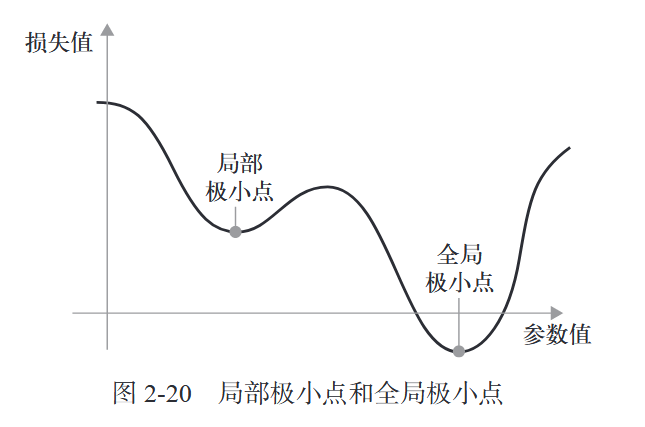

### 2.4.4 链式求导：反向传播算法

**反向传播算法**（backpropagation algorithm）

#### 1. 链式法则

一个两层网络的模型：

```
loss_value = loss(y_true, softmax(dot(relu(dot(inputs, W1) + b1), W2) + b2))
```

这种函数链可以利用**链式法则**（chain rule）进行求导。考虑两个函数 `f` 和 `g`，以及它们的复合函数 `fg`：`fg(x) == f(g(x))`。**链式法则规定**：`grad(y, x) == grad(y, x1) * grad(x1, x)`。

#### 2. 用计算图形进行自动微分

在一次迭代中 `input` 数据经过神经网络得到 `pred` 并计算得到损失值 `loss_val` 的过程称为**前向传播**。

这个过程如果反过来进行，就叫做**反向传播**。这个过程我们可以计算出各个参数的梯度。

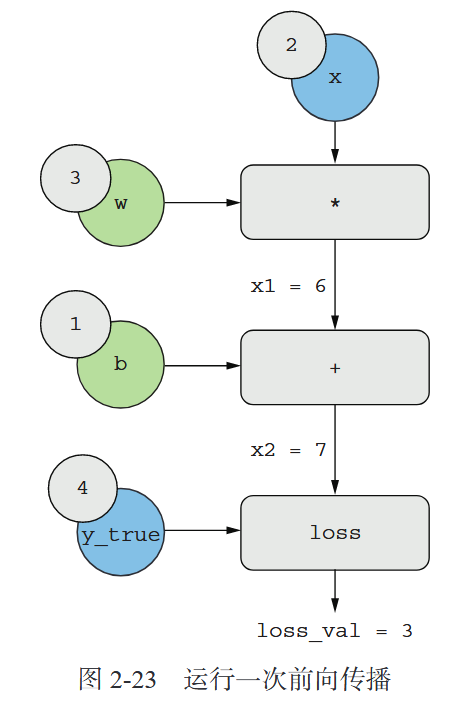 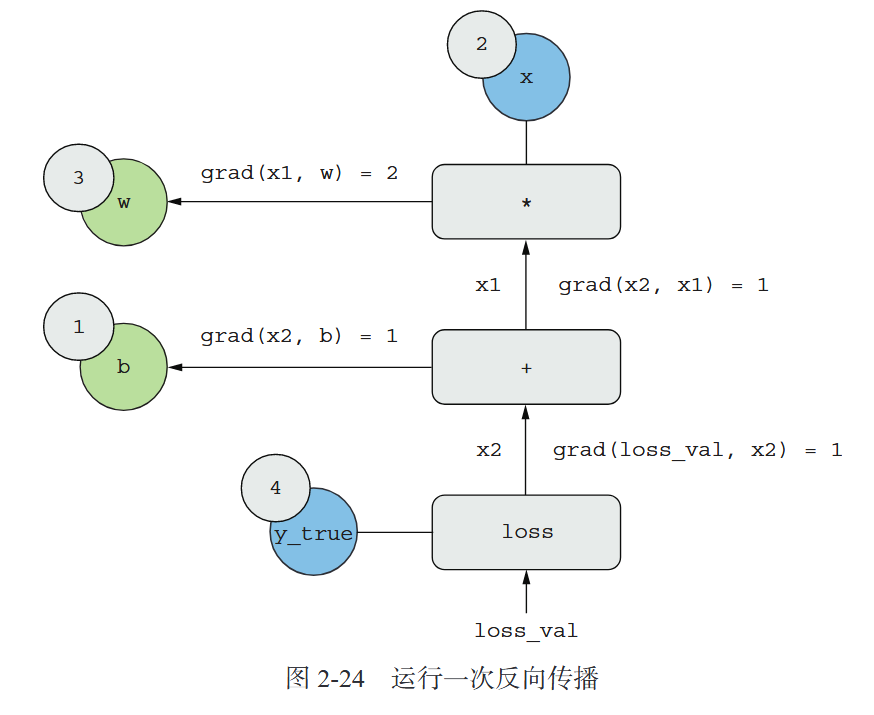

#### 3. TensorFlow 的梯度带

`tf.Variable` 是一类用于保存可变状态的张量，比如：神经网络的权重。

## 2.5 回顾第一个例子

### 2.5.1 用 TensorFlow 从头开始重新实现第一个例子

#### 1. 简单的 Dense 类

`activation` 是一个逐元素的函数：`output = activation(dot(W, input) + b)`

实现一个简单的 Python 类 `NaiveDense`，它创建了两个TensorFlow 变量 `W` 和 `b`，并定义了一个 `__call__()` 方法。

In [12]:
import tensorflow as tf
import numpy as np

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation
        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)
        
        b_shape = (output_size,)
        b_initial_value = np.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)
        
    def __call__(self, inputs): # 前向传播
        return self.activation(tf.matmul(inputs, self.W) + self.b)
    
    @property
    def weights(self): # 获取该层权重的便捷方法
        return [self.W, self.b]

#### 2. 简单的 Sequential 类

In [13]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers
        
    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return x
    
    @property
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights
        return weights

In [14]:
model = NaiveSequential([
    NaiveDense(input_size=28*28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### 3. 批量生成器

In [15]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size) # 向上取整
        
    def next(self):
        images = self.images[self.index: self.index + self.batch_size]
        labels = self.labels[self.index: self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### 2.5.2 完成一次训练步骤

In [25]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss
    
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)
        

在实践中，上面这些代码可以通过调用 `Keras` 和 `Optimizer` 实例进行权重更新。

In [17]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### 2.5.3 完整的训练循环

In [18]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

运行：

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

In [ ]:
for epoch_counter in range(3):
    print(f"Epoch {epoch_counter}")
    batch_generator = BatchGenerator(train_images, train_labels)
    for batch_counter in range(batch_generator.num_batches):
        images_batch, labels_batch = batch_generator.next()
        loss = one_training_step(model, images_batch, labels_batch)
        if batch_counter % 100 == 0:
            print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:

    loss = one_training_step(model, images_batch, labels_batch)
    if batch_counter % 100 == 0:
        print(f"loss at batch {batch_counter}: {loss:.2f}")

#### 2.5.4 评估模型

评估模型的方法是对模型在测试数据上预测取值 `argmax`，并将其与预期标签进行比较。

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")